We will first generate some noisy data. We will then fit a curve to this data using `optimize_arguments`.

<IPython.core.display.Javascript object>


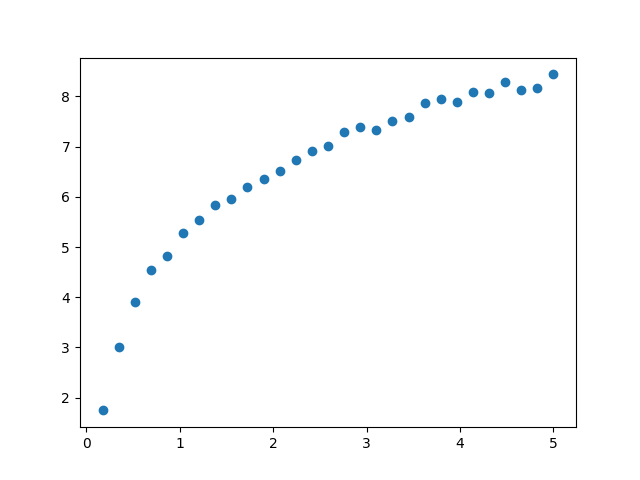

In [23]:
# display interactive figures
%matplotlib notebook

#import necessary modules
import matplotlib as mpl, matplotlib.pyplot as plt, \
    numpy as np
from optimize_arguments import optimize_arguments
from pickle import loads, dumps
from scipy.optimize import minimize

import warnings
warnings.filterwarnings('ignore')

# generate x and y data
xs = np.linspace(0, 5, 30)
ys = 2 * np.log(xs) + 5

# add noise
ys += np.random.random_sample(size = (len(ys))) * .3

# plot data
ax = plt.subplots()[1]
ax.plot(xs, ys, linestyle = '', marker = 'o')

The data above represents the logarithmic function $y = 2 \log x + 5$ with some noise added. We will now use `optimize_arguments` try to fit the general function $a \log (x + b) + c$ to the data, where $a$, $b$ and $c$ will be unknown free parameters that need to be evaluated.

In [27]:
# Fitting Curve


# The first required argument of opt_args is: x_dicts
# It is a list of dictionaries. Each x_dict contains information about one
# of the datasets from the group of datasets that we are trying to collapse 
# (minimize least squares distance between)

# Let us create the appropriate x_dicts for our curve fitting problem

# The zeroth x_dict will simply be our generated data
x_dict0 = {# xs is the only required key-value data in every x_dict
           'xs': ys
          }

# The next x_dict will contain information about the function we want to fit
x_dict1 = {'xs': xs,
           
           # y_func is the function we wish to fit
          'y_func': lambda x, a, b, c: a * np.log(x + b) + c,
           
           # arg_inds specify the free parameters in the fit function
           'arg_inds': ['a', 'b', 'c']
          }

# adding the x_dicts to the x_dicts list
x_dicts = [x_dict0, x_dict1]

# The next required argument: trial_args
# trial_args are the initial values of the free parameters that 
# may be present in one or more x_dicts. They serve as a starting point for 
# the search for optimal parameters.
trial_args = {'a': 2, 'b': 0, 'c': 5}
           
# The next optional argument: args_deltas
# An arg_delta specifies the region around an arg that will be explored
# for the optimal value, specifically arg*(1 - arg_delta) to arg*(1 + arg_delta).
# For instance, if b = 1 with an arg_delta of 10, the search region for b will 
# span from -9 to 11.
# By default, the delta for an arg will be 10 times its trial value.
args_deltas = {'a': 100.,'b': 2.,'c': np.inf}

# We can now use this information to run opt_args
# This will return a dictionary of useful information
opt_args_dict = optimize_arguments(x_dicts, trial_args, args_deltas)

print 'opt_args_dict =', opt_args_dict

[(-98.0, 102.0), (-inf, inf), (-2.0, 2.0)]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.94392555863
            Iterations: 20
            Function evaluations: 133
            Gradient evaluations: 20
opt_args_dict = {'finite_ixs': array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool), 'args': {'a': 2.0161284114075229, 'c': 5.1108049869737924, 'b': 0.015948678371435713}, 'ys_list': [{'y_offset': 0.0, 'ys': array([ 1.74514741,  3.00463421,  3.89958676,  4.54255234,  4.81191042,
        5.2842504 ,  5.53067771,  5.83684868,  5.96014142,  6.19403704,
        6.36195156,  6.50609879,  6.74230588,  6.919893  ,  7.01649478,
        7.2994995 ,  7.38345442,  7.33524952,  7.51133623,  7.59477382,
        7.87074477,  7.9528162 ,  7.8842074 ,  8.0961609

**Understanding The Output**

The output returned is a dictionary with the following keys: 'args', 'ys_list' and 'finite_ixs'.

    args: dictionary
        Contains the optimal values of the unknown parameters. In our case, 'a', 'b' and 'c'.
    
    ys_list: list of dictionaries
        Each dictionary contains information about ys for a corresponding x_dict. The most important key in each dictionary is 'ys'.
        ys: float array
            The fitted data obtained with the optimal parameters.
        
    finite_ixs: bool array
        Index array to access the only those x-indices for which all xs arrays have finite values.

Inspecting the ** *args* ** in the output, we see that the estimated values for the parameters are $a = 2.02$, $b = 0.02$ and $c = 5.11$. These are very close to the true values of $a = 2$, $b = 0$ and $c = 5$. The noise we added when generating the data also contributes to the differences between the estimates and true values.

We now use the ** *finite_ixs* ** and ** *ys_list* ** from the output to plot the best-fit curve over the original data below. We see a good visual agreement between the estimated curve and the actual data.

<IPython.core.display.Javascript object>


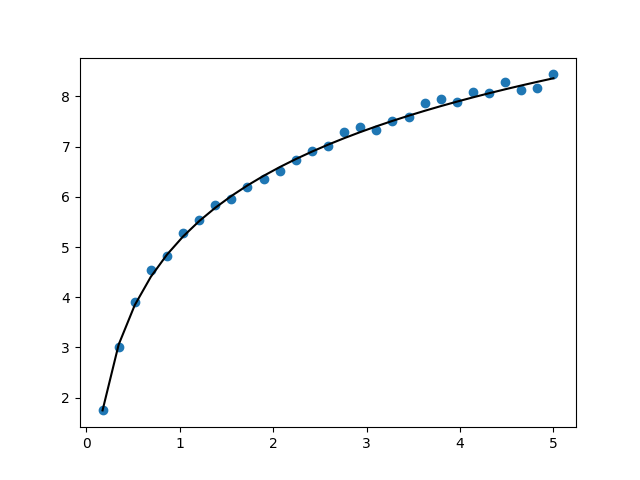

In [29]:
# Plotting resulting fit

ax2 = loads(dumps(ax))
ax2.plot(xs[opt_args_dict['finite_ixs']], opt_args_dict['ys_list'][1]['ys'], 
        color = 'black')